In [48]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [49]:
with np.load("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/BeamEnergyMapTo_dE_dx.npz", allow_pickle=True) as f:
    dir_diff_ion = f["dir_diff_ion"].item()
material = "_quartz"
with np.load("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_BeamCertain/BeamEnergySmear"+material+".npz", allow_pickle=True) as f:
    dir_BeamE_init = f["dir_BeamE_init"].item()
    dir_BeamE_out = f["dir_BeamE_out"].item()

with np.load("/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run_BeamCertain_acrylic/BeamEnergySmear.npz", allow_pickle=True) as f:
    dir_BeamE_init_acrylic = f["dir_BeamE_init"].item()
    dir_BeamE_out_acrylic = f["dir_BeamE_out"].item()



H_2 498.7248322147651
He_4 997.4496644295302
Li_6 1496.1744966442952
B_10 2493.6241610738257
C_12 2992.3489932885905
N_14 3491.0738255033557
O_16 3989.798657718121
F_18 4488.523489932886
Ne_20 4987.248322147651
Na_22 5485.973154362417


Text(0, 0.5, 'dE/dx [ MeV/mm ]')

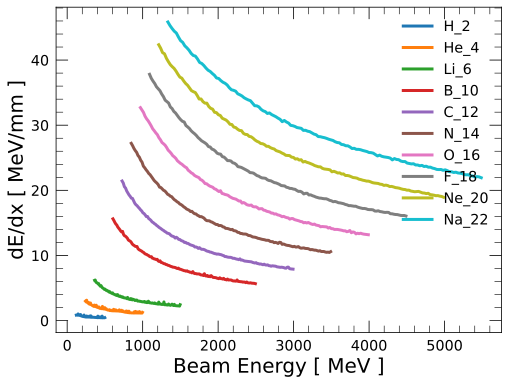

In [56]:
from scipy import interpolate
dir_func_diff_ion = {}
for ion, dir_dE_dx in dir_diff_ion.items():
    plt.plot(dir_dE_dx["BeamE"]*int(ion.split('_')[1]), dir_dE_dx["dE/dx"], label=ion)
    # f = interpolate.interp1d(dir_dE_dx["dE/dx"], dir_dE_dx["BeamE"]*int(ion.split('_')[1]),kind="linear",fill_value="extrapolate")
    # f = interpolate.interp1d( dir_dE_dx["BeamE"]*int(ion.split('_')[1]),dir_dE_dx["dE/dx"],kind="linear")
    f = interpolate.interp1d( dir_dE_dx["BeamE"]*int(ion.split('_')[1]),dir_dE_dx["dE/dx"],kind="linear",fill_value="extrapolate")
    print(ion, max(dir_dE_dx["BeamE"]*int(ion.split('_')[1])) )
    dir_func_diff_ion[ion] = f
plt.legend()
plt.xlabel("Beam Energy [ MeV ]")
plt.ylabel("dE/dx [ MeV/mm ]")

<AxesSubplot:xlabel='ion', ylabel='BeamE_init'>

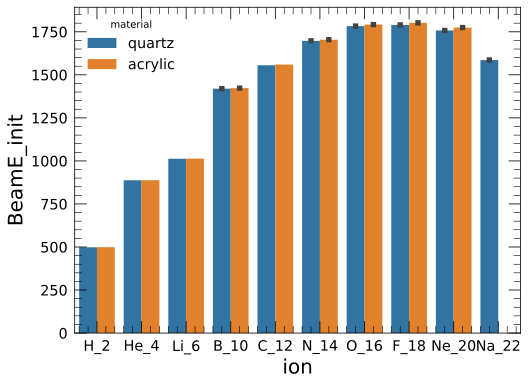

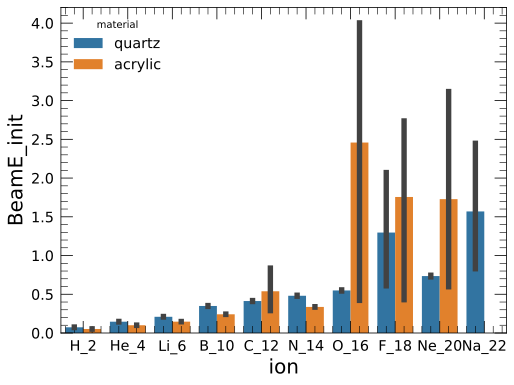

In [51]:
dir_BeamE_init_to_df = {"BeamE_init":[], "BeamE_out":[],"ion":[], "dE/dx_init":[], "dE/dx_out":[], "material":[]}
for name_ion in dir_BeamE_init.keys():
    index = dir_BeamE_init[name_ion]>100
    dir_BeamE_init[name_ion] = dir_BeamE_init[name_ion][index]
    dir_BeamE_out[name_ion] = dir_BeamE_out[name_ion][index]
    dir_BeamE_init_to_df["BeamE_init"].extend(dir_BeamE_init[name_ion])
    dir_BeamE_init_to_df["dE/dx_init"].extend(dir_func_diff_ion[name_ion](dir_BeamE_init[name_ion]))
    dir_BeamE_init_to_df["BeamE_out"].extend(dir_BeamE_out[name_ion])
    dir_BeamE_init_to_df["dE/dx_out"].extend(dir_func_diff_ion[name_ion](dir_BeamE_out[name_ion]))
    dir_BeamE_init_to_df["ion"].extend([name_ion]*len(dir_BeamE_init[name_ion]))
    dir_BeamE_init_to_df["material"].extend(["quartz"]*len(dir_BeamE_init[name_ion]))

for name_ion in dir_BeamE_init_acrylic.keys():
    index = (dir_BeamE_init_acrylic[name_ion]>100)
    dir_BeamE_init_acrylic[name_ion] = dir_BeamE_init_acrylic[name_ion][index]
    dir_BeamE_out_acrylic[name_ion] = dir_BeamE_out_acrylic[name_ion][index]
    dir_BeamE_init_to_df["BeamE_init"].extend(dir_BeamE_init_acrylic[name_ion])
    dir_BeamE_init_to_df["dE/dx_init"].extend(dir_func_diff_ion[name_ion](dir_BeamE_init_acrylic[name_ion]))
    dir_BeamE_init_to_df["BeamE_out"].extend(dir_BeamE_out_acrylic[name_ion])
    dir_BeamE_init_to_df["dE/dx_out"].extend(dir_func_diff_ion[name_ion](dir_BeamE_out_acrylic[name_ion]))
    dir_BeamE_init_to_df["ion"].extend([name_ion]*len(dir_BeamE_init_acrylic[name_ion]))
    dir_BeamE_init_to_df["material"].extend(["acrylic"]*len(dir_BeamE_init_acrylic[name_ion]))


import seaborn as sns
import pandas as pd
df_BeamE = pd.DataFrame.from_dict(dir_BeamE_init_to_df)
# sns.boxplot(x="ion", y="BeamE_out",data=df_BeamE)
plt.figure()
sns.barplot(x="ion", y="BeamE_init",data=df_BeamE, hue="material")
#
# plt.figure()
# sns.boxplot(x="ion", y="dE/dx_init", data=df_BeamE)
# plt.ylim(0,45)


plt.figure()
sns.barplot(x="ion", y="BeamE_init", data=df_BeamE, hue="material",estimator=np.std)

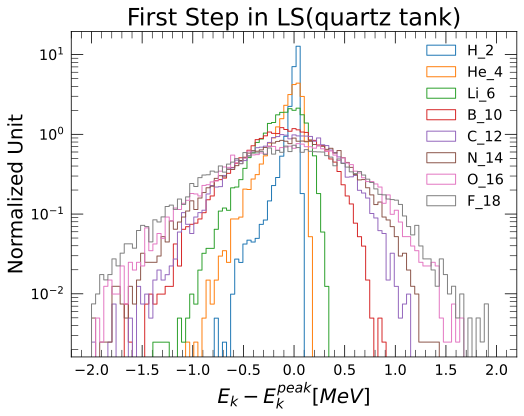

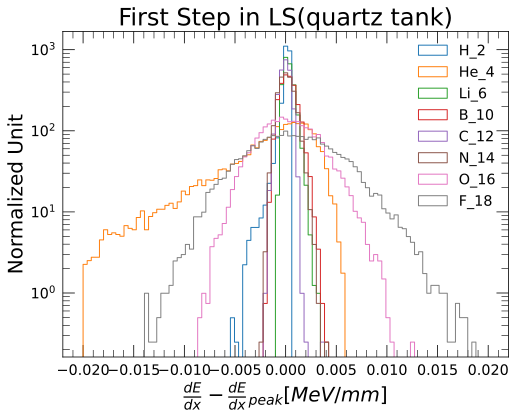

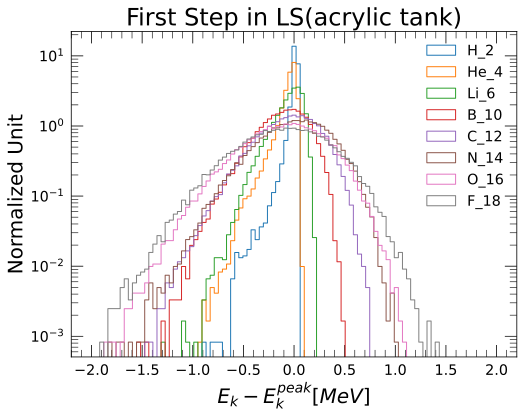

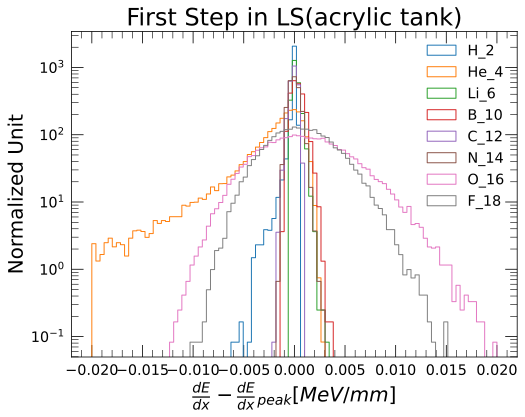

In [55]:
from HistTools import GetMaxArgOfHist
v_material = ["quartz", "acrylic"]
for material in v_material:
    plt.figure(f"BeamE init {material}")
    plt.figure(f"Beam dE/dx init {material}")
for i, dir_BeamE_init_tmp in enumerate([dir_BeamE_init, dir_BeamE_init_acrylic]):
    for name_ion, v_BeamE_init in dir_BeamE_init_tmp.items():
        if name_ion == "Ne_20" or name_ion=="Na_22":
            continue
        v_BeamE_init = v_BeamE_init[v_BeamE_init>100]

        plt.figure(f"BeamE init {v_material[i]}")
        mean_v_BeamE = np.mean(v_BeamE_init)
        peak_BeamE_init = GetMaxArgOfHist(v_BeamE_init, bins=np.linspace(mean_v_BeamE-3, mean_v_BeamE+3, 100))
        plt.hist(v_BeamE_init-peak_BeamE_init, bins=np.linspace(-2, 2,100), label=name_ion,histtype="step",density=True)
        plt.xlabel("$E_k - E_k^{peak} [ MeV ]$")
        plt.ylabel("Normalized Unit")
        # plt.title("First Step in LS")
        plt.title(f"First Step in LS({v_material[i]} tank)")
        plt.legend()
        plt.semilogy()

        plt.figure(f"Beam dE/dx init {v_material[i]}")

        v_dE_dx_init = dir_func_diff_ion[name_ion](v_BeamE_init)
        peak_dE_dx_init = dir_func_diff_ion[name_ion](peak_BeamE_init)
        plt.hist(v_dE_dx_init-peak_dE_dx_init, bins=np.linspace(-0.02, 0.02,100), label=name_ion,histtype="step",density=True)
        # plt.hist(v_dE_dx_init, bins=np.linspace(33.9, 34.1,100), label=name_ion,histtype="step",density=False)
        plt.semilogy()
        plt.legend()
        plt.xlabel(r"$\frac{dE}{dx}-\frac{dE}{dx}_{peak} [ MeV/mm ]$")
        plt.title(f"First Step in LS({v_material[i]} tank)")
        plt.ylabel("Normalized Unit")



H_2 498.6070238204251 495.64118540791355
He_4 887.5761190815417 812.276875576225
Li_6 1012.6713376067809 989.8413962396896
B_10 1419.580920750692 1352.3499062668682
C_12 1555.2393127769606 1406.2346559363057
N_14 1698.001775982147 1404.618775705633
O_16 1783.3243482192615 1172.7264580297003
F_18 1789.2809972222028 1325.03300835003
Ne_20 1756.375035700793 783.6361748006717
Na_22 1586.5473469368153 300.7390577393721


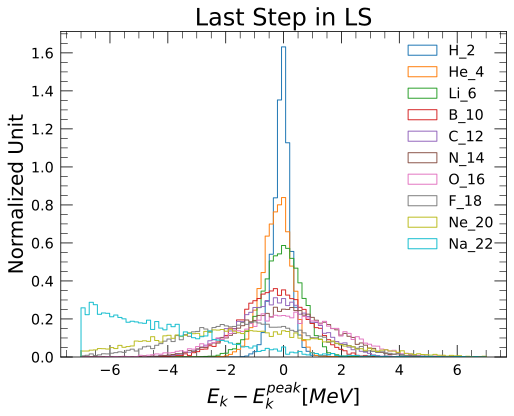

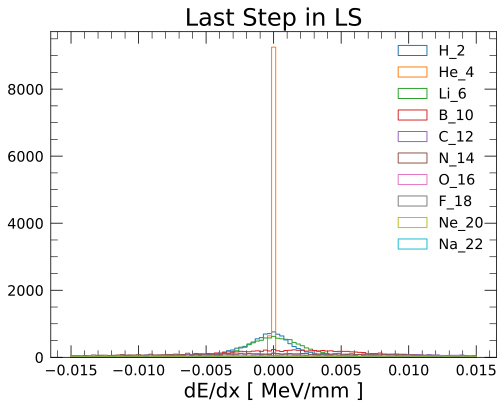

In [53]:
plt.figure("BeamE init")
plt.figure("Beam dE/dx init")
for name_ion, v_BeamE_init in dir_BeamE_out.items():
    # if name_ion == "Ne_20":
    #     continue
    v_BeamE_init = v_BeamE_init[v_BeamE_init>100]

    plt.figure("BeamE init")
    mean_v_BeamE = np.mean(v_BeamE_init)
    peak_BeamE_init = GetMaxArgOfHist(v_BeamE_init, bins=np.linspace(mean_v_BeamE-3, mean_v_BeamE+3, 100))
    plt.hist(v_BeamE_init-peak_BeamE_init, bins=np.linspace(-7, 7,100), label=name_ion,histtype="step",density=True)
    # plt.hist(v_BeamE_init, bins=np.linspace(1770,1800,100), label=name_ion,histtype="step",density=False)
    # plt.semilogy()
    plt.xlabel("$E_k - E_k^{peak} [ MeV ]$")
    plt.ylabel("Normalized Unit")
    plt.title("Last Step in LS")
    plt.legend()

    plt.figure("Beam dE/dx init")
    # if name_ion == "H_2":
    #     continue
    # v_BeamE_init = v_BeamE_init[v_BeamE_init>100]
    print(name_ion,max(v_BeamE_init), min(v_BeamE_init))
    v_dE_dx_init = dir_func_diff_ion[name_ion](v_BeamE_init)
    peak_dE_dx_init = dir_func_diff_ion[name_ion](peak_BeamE_init)
    plt.hist(v_dE_dx_init-peak_dE_dx_init, bins=np.linspace(-0.015, 0.015,100), label=name_ion,histtype="step",density=False)
    # plt.hist(v_dE_dx_init, bins=np.linspace(33.9, 34.1,100), label=name_ion,histtype="step",density=False)
    # plt.semilogy()
    plt.legend()
    plt.xlabel("dE/dx [ MeV/mm ]")
    plt.title("Last Step in LS")